In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("../input/machine-predictive-maintenance-classification/predictive_maintenance.csv")

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.iloc[:,-1].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

# Covering Memory Leak
 ### Can not use both Target and Failure Type at the same time. As both of them together will have Data leak. 


In [7]:
df.drop(df.columns[:2],axis=1,inplace=True)

In [8]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')

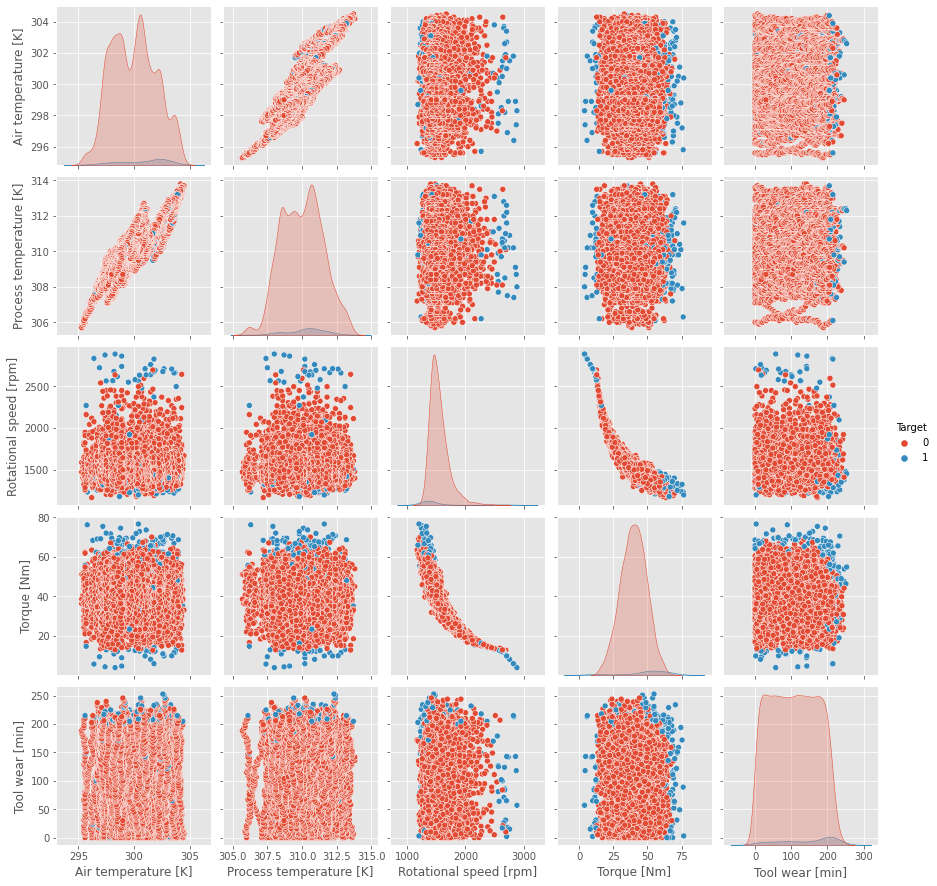

In [10]:
sns.pairplot(df,hue = "Target")

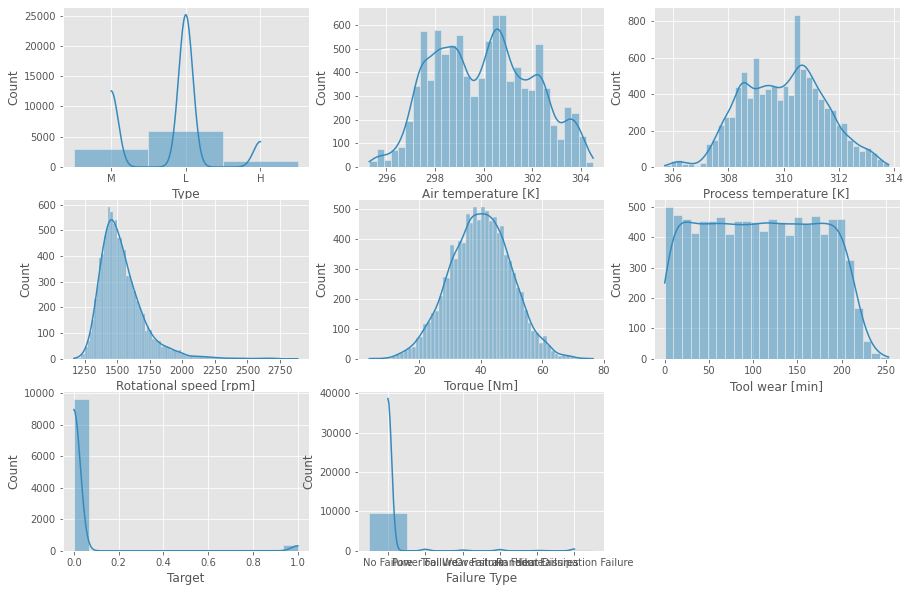

In [11]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(df,test_size = 0.3)

In [13]:
df = X_train

In [14]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8345,H,298.8,309.8,1490,35.9,171,0,No Failure
4758,L,303.5,311.6,1465,48.7,60,0,No Failure
4429,M,302.3,310.1,1731,33.4,112,0,No Failure
7289,L,300.3,310.6,1433,53.8,86,0,No Failure
2699,L,299.9,309.4,1363,60.9,57,0,No Failure


## Need to min max Scaler on Roatation speed and Standard scaller on all
- ### Use MinMaxScaler as your default
- ### Use RobustScaler if you have outliers and can handle a larger range
- ### Use StandardScaler if you need normalized features
- ### Use Normalizer sparingly - it normalizes rows, not columns

<AxesSubplot:>

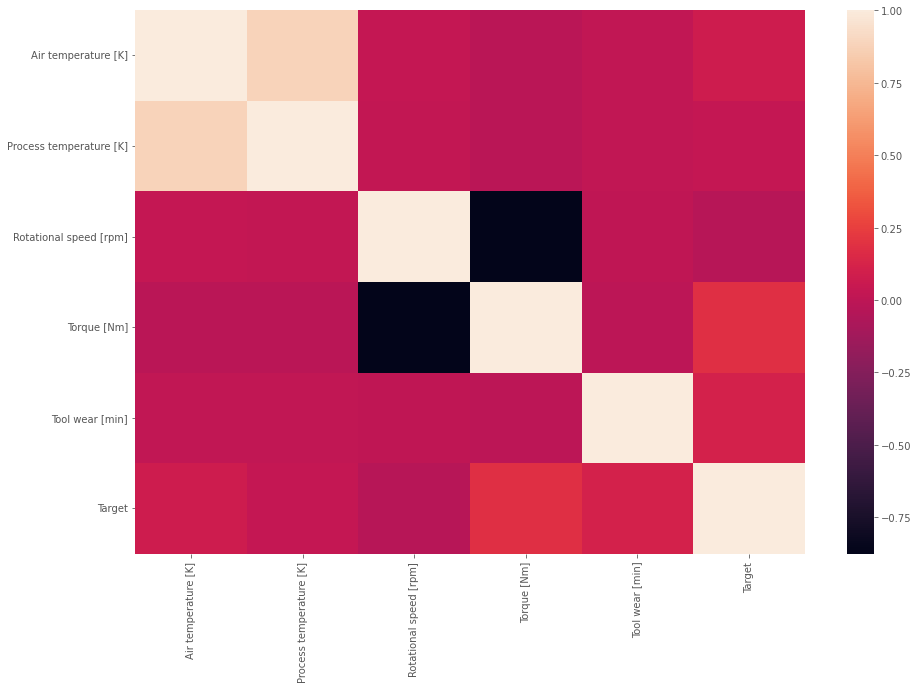

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [16]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,299.979543,309.998600,1537.819857,39.996314,107.842000,0.031286
std,1.994737,1.484473,176.496702,9.936094,63.544391,0.174101
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.750000,33.200000,53.000000,0.000000
50%,300.000000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1611.000000,46.700000,162.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,251.000000,1.000000


In [17]:
df.drop(df.columns[-1],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8345,H,298.8,309.8,1490,35.9,171,0
4758,L,303.5,311.6,1465,48.7,60,0
4429,M,302.3,310.1,1731,33.4,112,0
7289,L,300.3,310.6,1433,53.8,86,0
2699,L,299.9,309.4,1363,60.9,57,0


In [19]:
df.Target.value_counts()

0    6781
1     219
Name: Target, dtype: int64

In [20]:
df.Type.value_counts()

L    4221
M    2081
H     698
Name: Type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target', ylabel='count'>

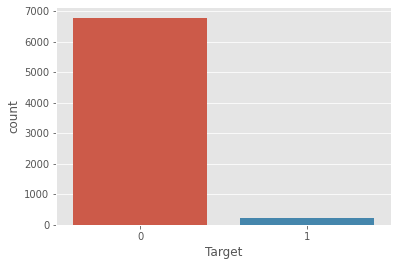

In [21]:
sns.countplot(df.Target)

In [22]:
passed=df[df.Target==0]
failed=df[df.Target==1]

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
df=pd.get_dummies(df,columns=["Type"],drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

In [25]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
8345,298.8,309.8,1490,35.9,171,0,0,0
4758,303.5,311.6,1465,48.7,60,0,1,0
4429,302.3,310.1,1731,33.4,112,0,0,1
7289,300.3,310.6,1433,53.8,86,0,1,0
2699,299.9,309.4,1363,60.9,57,0,1,0


In [26]:
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [27]:
df=df.sample(frac=1).reset_index(drop=True)

In [28]:
df.columns=df.columns.astype("str")

In [29]:
col_name=df.columns.to_list()

In [30]:
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Type_L',
 'Type_M']

In [31]:
target_col=col_name.pop(-3)

In [32]:
feature_col=col_name

In [33]:
target_col

'Target'

In [34]:
feature_col

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Type_L',
 'Type_M']

In [35]:
y=df.Target.values

# Implementing Over sampling for Data Handling

In [36]:
from imblearn.combine import SMOTETomek
# For over sampling the data

In [37]:
df_train=df.drop(df.columns[-3],axis=1)

In [38]:
df_train_val=df_train.values

In [39]:
df_train_val

array([[2.982e+02, 3.079e+02, 1.529e+03, ..., 1.050e+02, 0.000e+00,
        1.000e+00],
       [3.026e+02, 3.117e+02, 1.471e+03, ..., 2.500e+01, 0.000e+00,
        0.000e+00],
       [3.019e+02, 3.104e+02, 1.884e+03, ..., 1.630e+02, 1.000e+00,
        0.000e+00],
       ...,
       [2.997e+02, 3.092e+02, 1.608e+03, ..., 6.800e+01, 0.000e+00,
        1.000e+00],
       [3.002e+02, 3.114e+02, 1.450e+03, ..., 6.800e+01, 0.000e+00,
        1.000e+00],
       [2.975e+02, 3.088e+02, 1.603e+03, ..., 1.840e+02, 1.000e+00,
        0.000e+00]])

In [40]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
from collections import Counter

In [42]:
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(df_train_val,y)

In [43]:
X_res.shape,y_res.shape

((13466, 7), (13466,))

In [44]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({0: 6781, 1: 219})
Resampled Dataset Shape Counter({0: 6733, 1: 6733})


In [45]:
df_new=pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

In [46]:
df_new.head()

,0,1,2,3,4,5,6,0
0,298.2,307.9,1529.0,36.6,105.0,0.0,1.0,0
1,302.6,311.7,1471.0,48.3,25.0,0.0,0.0,0
2,301.9,310.4,1884.0,23.4,163.0,1.0,0.0,0
3,301.6,310.2,1384.0,57.1,68.0,1.0,0.0,0
4,301.7,311.1,1489.0,41.4,108.0,0.0,1.0,0


In [47]:
col_new=df_train.columns

In [48]:
col_new=col_new.to_list()

In [49]:
col_new.append(target_col)

In [50]:
df_new.columns=col_new

In [51]:
df_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M,Target
0,298.2,307.9,1529.0,36.6,105.0,0.0,1.0,0
1,302.6,311.7,1471.0,48.3,25.0,0.0,0.0,0
2,301.9,310.4,1884.0,23.4,163.0,1.0,0.0,0
3,301.6,310.2,1384.0,57.1,68.0,1.0,0.0,0
4,301.7,311.1,1489.0,41.4,108.0,0.0,1.0,0


# Checking for outliers

<AxesSubplot:xlabel='Target', ylabel='Air temperature [K]'>

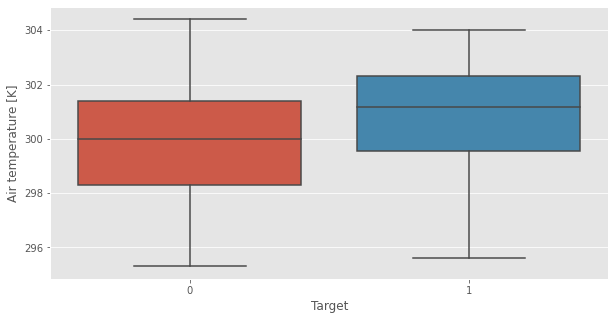

In [52]:
## Checking in Air Temp
plt.figure(figsize=(10,5))

sns.boxplot(y=feature_col[0],x="Target",data=df_new)

<AxesSubplot:xlabel='Target', ylabel='Process temperature [K]'>

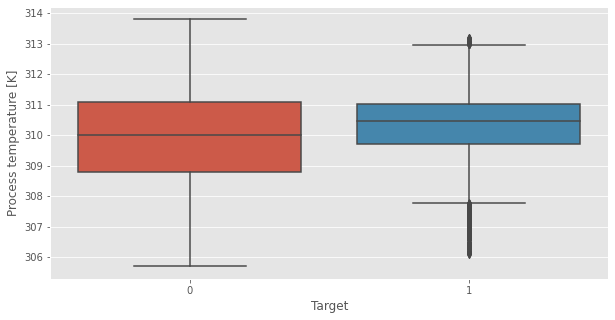

In [53]:
## Checking in Process Temp
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[1],x="Target",data=df_new)

<AxesSubplot:xlabel='Target', ylabel='Rotational speed [rpm]'>

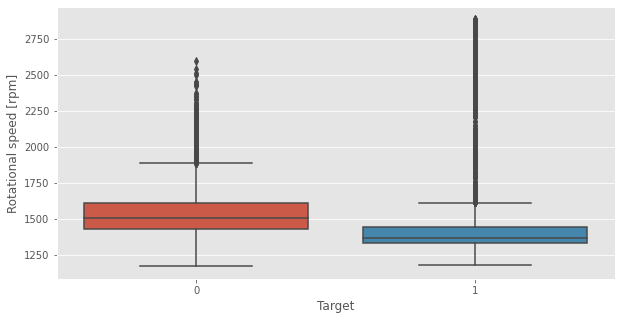

In [54]:
## Checking in Rotational Speed

plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[2],x="Target",data=df_new)

<AxesSubplot:xlabel='Target', ylabel='Torque [Nm]'>

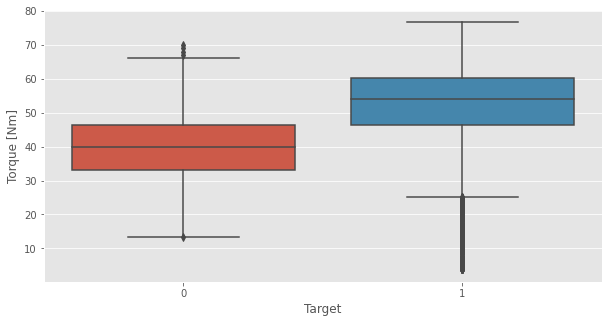

In [55]:
## Checking in Torque
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[3],x="Target",data=df_new)

<AxesSubplot:xlabel='Target', ylabel='Tool wear [min]'>

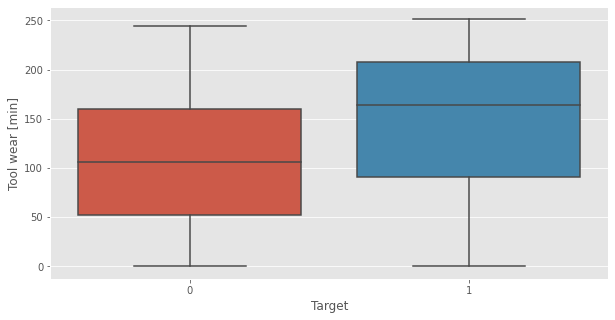

In [56]:
## Checking in Tool wear
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[4],x="Target",data=df_new)

In [57]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,298.2,307.9,1529,36.6,105,0,0,1
1,302.6,311.7,1471,48.3,25,0,0,0
2,301.9,310.4,1884,23.4,163,0,1,0
3,301.6,310.2,1384,57.1,68,0,1,0
4,301.7,311.1,1489,41.4,108,0,0,1


In [58]:
df_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M,Target
0,298.2,307.9,1529.0,36.6,105.0,0.0,1.0,0
1,302.6,311.7,1471.0,48.3,25.0,0.0,0.0,0
2,301.9,310.4,1884.0,23.4,163.0,1.0,0.0,0
3,301.6,310.2,1384.0,57.1,68.0,1.0,0.0,0
4,301.7,311.1,1489.0,41.4,108.0,0.0,1.0,0


# Using Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
acc_log=[]

In [60]:
## Building a Classification model using 
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass
    

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2880
           1       0.16      0.78      0.26       120

    accuracy                           0.82      3000
   macro avg       0.57      0.80      0.58      3000
weighted avg       0.96      0.82      0.87      3000

The accuracy for Fold 1 : 0.8003472222222223
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2880
           1       0.15      0.78      0.26       120

    accuracy                           0.82      3000
   macro avg       0.57      0.80      0.58      3000
weighted avg       0.96      0.82      0.87      3000

The accuracy for Fold 2 : 0.7994791666666666
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2880
           1       0.16      0.78      0.26       120

    accuracy                       

# Using Naive Bayers

In [61]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2880
           1       0.15      0.72      0.25       120

    accuracy                           0.82      3000
   macro avg       0.57      0.78      0.57      3000
weighted avg       0.95      0.82      0.87      3000

The accuracy for 1 : 0.7765625
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2880
           1       0.15      0.72      0.25       120

    accuracy                           0.82      3000
   macro avg       0.57      0.78      0.57      3000
weighted avg       0.95      0.82      0.87      3000

The accuracy for 2 : 0.7763888888888889
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2880
           1       0.15      0.72      0.25       120

    accuracy                           0.82      3000


# Using SVM(Support Vector Machines)
### We need to choose the best Kernel according to our need.

- #### The linear kernel is mostly preferred for text classification problems as it performs well for large datasets. 
- #### Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- #### Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- #### Polynomial kernels give good results for problems where all the training data is normalized. 


In [62]:
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      2880
           1       0.16      0.78      0.27       120

    accuracy                           0.83      3000
   macro avg       0.58      0.80      0.59      3000
weighted avg       0.96      0.83      0.88      3000

The accuracy for 1 : 0.8046875
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2880
           1       0.16      0.78      0.27       120

    accuracy                           0.83      3000
   macro avg       0.58      0.80      0.59      3000
weighted avg       0.96      0.83      0.88      3000

The accuracy for 2 : 0.8045138888888889
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2880
           1       0.17      0.78      0.27       120

    accuracy                           0.83      3000


In [63]:
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.95      0.50      0.65      2880
           1       0.03      0.39      0.06       120

    accuracy                           0.49      3000
   macro avg       0.49      0.44      0.35      3000
weighted avg       0.91      0.49      0.63      3000

The accuracy for 1 : 0.44357638888888884
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.95      0.48      0.64      2880
           1       0.03      0.38      0.06       120

    accuracy                           0.48      3000
   macro avg       0.49      0.43      0.35      3000
weighted avg       0.91      0.48      0.62      3000

The accuracy for 2 : 0.4331597222222222
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.48      0.64      2880
           1       0.03      0.39      0.06       120

    accuracy                           0.48 

In [64]:
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2880
           1       0.32      0.87      0.47       120

    accuracy                           0.92      3000
   macro avg       0.66      0.90      0.71      3000
weighted avg       0.97      0.92      0.94      3000

The accuracy for 1 : 0.8954861111111112
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2880
           1       0.32      0.88      0.47       120

    accuracy                           0.92      3000
   macro avg       0.66      0.90      0.71      3000
weighted avg       0.97      0.92      0.94      3000

The accuracy for 2 : 0.8982638888888889
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2880
           1       0.32      0.87      0.47       120

    accuracy                           0.92  

In [65]:
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2880
           1       0.21      0.82      0.34       120

    accuracy                           0.87      3000
   macro avg       0.60      0.85      0.64      3000
weighted avg       0.96      0.87      0.91      3000

The accuracy for 1 : 0.8496527777777778
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2880
           1       0.21      0.83      0.34       120

    accuracy                           0.87      3000
   macro avg       0.60      0.85      0.63      3000
weighted avg       0.96      0.87      0.90      3000

The accuracy for 2 : 0.851388888888889
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2880
           1       0.21      0.82      0.34       120

    accuracy                           0.87   

# Using  KNN
## The optimal K value usually found is the square root of N, where N is the total number of samples.

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2880
           1       0.41      0.78      0.53       120

    accuracy                           0.95      3000
   macro avg       0.70      0.87      0.75      3000
weighted avg       0.97      0.95      0.95      3000

The accuracy for 1 : 0.8677083333333332
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2880
           1       0.40      0.78      0.53       120

    accuracy                           0.94      3000
   macro avg       0.69      0.86      0.75      3000
weighted avg       0.97      0.94      0.95      3000

The accuracy for 2 : 0.8630208333333332
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2880
           1       0.39      0.78      0.52       120

    accuracy                           0.94  

<AxesSubplot:ylabel='Count'>

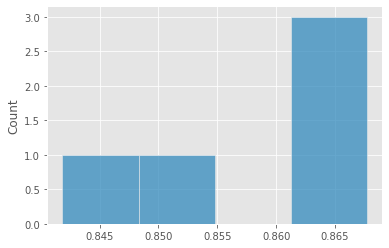

In [66]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=4)
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
sns.histplot(acc_KNN)

# Using Decission tree Classifier 

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2880
           1       0.47      0.73      0.57       120

    accuracy                           0.96      3000
   macro avg       0.73      0.85      0.77      3000
weighted avg       0.97      0.96      0.96      3000

The accuracy for 1 : 0.8493055555555556
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2880
           1       0.48      0.82      0.60       120

    accuracy                           0.96      3000
   macro avg       0.74      0.89      0.79      3000
weighted avg       0.97      0.96      0.96      3000

The accuracy for 2 : 0.8897569444444444
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2880
           1       0.48      0.79      0.60       120

    accuracy                           0.96  

<AxesSubplot:ylabel='Count'>

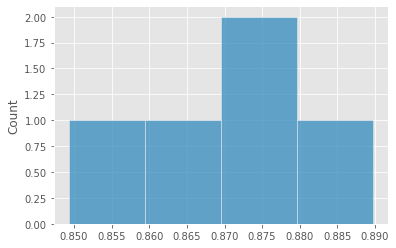

In [67]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
sns.histplot(acc_Dtree)

In [68]:
# import time
# while True:
#     print("5")
#     time.sleep(60)

# Using Random Forest Classifier

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2880
           1       0.57      0.72      0.63       120

    accuracy                           0.97      3000
   macro avg       0.78      0.85      0.81      3000
weighted avg       0.97      0.97      0.97      3000

The accuracy for 1 : 0.846875
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2880
           1       0.57      0.78      0.66       120

    accuracy                           0.97      3000
   macro avg       0.78      0.88      0.82      3000
weighted avg       0.97      0.97      0.97      3000

The accuracy for 2 : 0.8755208333333333
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2880
           1       0.59      0.80      0.68       120

    accuracy                           0.97      3000
 

<AxesSubplot:ylabel='Count'>

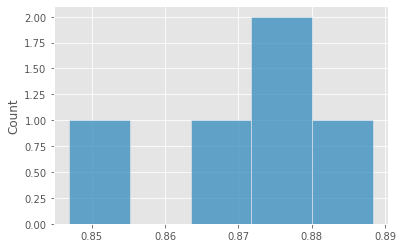

In [69]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=RandomForestClassifier(n_estimators=55,criterion="entropy")
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
sns.histplot(acc_RandF)

# Using XGBoost

In [70]:
# Checking the best accuracy in K-SVM using which Kernel;
fold_list=["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5"]


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:58:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2880
           1       0.62      0.78      0.69       120

    accuracy                           0.97      3000
   macro avg       0.80      0.88      0.84      3000
weighted avg       0.98      0.97      0.97      3000

The accuracy for 1 : 0.8774305555555555
[04:58:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2880
           1       0.65      0.86      0.74       120

    accuracy                           0.98      3000
   macro avg       0.82      0.92      0.86      3000
weighted avg       0.98      0.98      0.98      3000

The accuracy for 2 : 0.9196180555555555
[04:58:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2880
           1       0.65      0.79      0.71       120

    accuracy                           0.97      3000
   macro avg       0.82      0.89      0.85      3000
weighted avg       0.98      0.97      0.98      3000

The accuracy for 3 : 0.8868055555555555
[04:58:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The fold is : 3 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2880
           1       0.64      0.82      0.72       120

    accuracy                           0.97      3000
   macro avg       0.82      0.90      0.85      3000
weighted avg       0.98      0.97      0.98      3000

The accuracy for 4 : 0.8989583333333333
[04:58:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The fold is : 4 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2880
           1       0.66      0.83      0.74       120

    accuracy                           0.98      3000
   macro avg       0.83      0.91      0.86      3000
weighted avg       0.98      0.98      0.98      3000

The accuracy for 5 : 0.9078125


<AxesSubplot:ylabel='Count'>

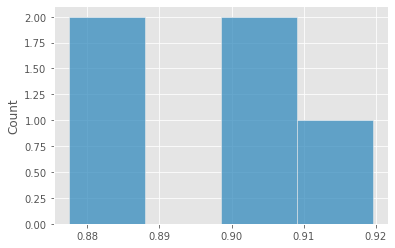

In [71]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
    acc=roc_auc_score(X_test[target_col].values,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
sns.histplot(acc_XGB)

In [72]:
import pickle

pickle.dump(clf,open("forest_pkl","wb"))
model_loaded = pickle.load(open("forest_pkl", "rb"))

# Summary
### As we can see from the 99% F1 Score that we obtained using Random Forest as well as XGBoost